# Speech Emotion Recognition – Preprocessing
## Notebook 4: Normalization / Scaling

**Registration Name:** ITxxxxxxxx  
**Task:** Apply normalization and scaling techniques to the dataset.  
**Objective:** Ensure all features contribute equally to the model by standardizing their ranges.

### Step 1: Importing Libraries and Data Arrays
First, we need to import the necessary Libraries and Data Arrays of Extracted Features.

In [2]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load dataset
X = np.load("../results/features_and_labels/X_features.npy", allow_pickle=False)
y = np.load("../results/features_and_labels/y_labels.npy", allow_pickle=True)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (2870, 116)
Labels shape: (2870,)


### Step 2: Inspect Feature Distributions
We will plot histograms of a few features to see their ranges before scaling.

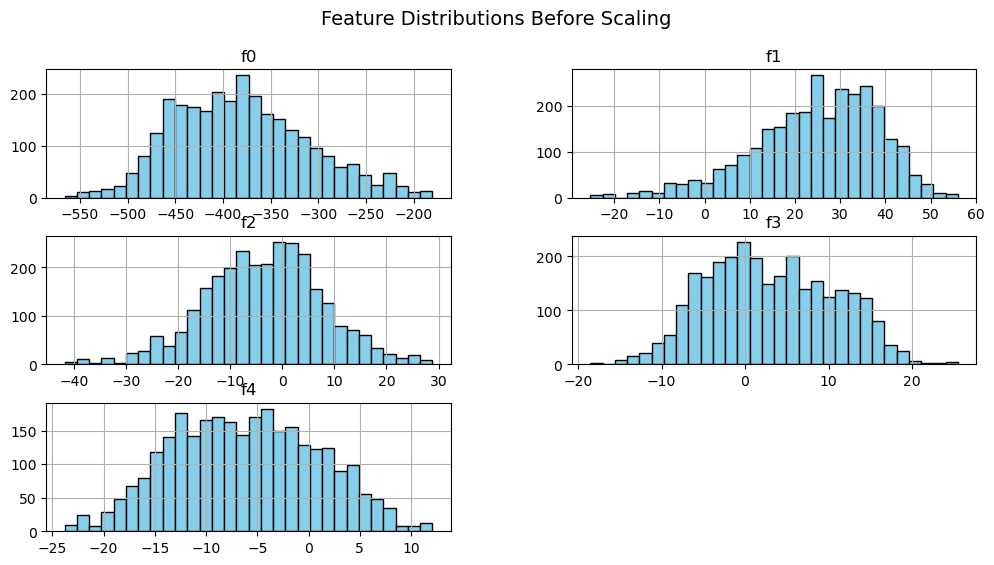

In [3]:
df = pd.DataFrame(X[:, :5], columns=[f"f{i}" for i in range(5)])

df.hist(bins=30, figsize=(12,6), color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions Before Scaling", fontsize=14)
plt.show()

### Step 3: Apply Standard Scaling
This method scales features so they have **mean = 0** and **standard deviation = 1**.

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Mean of scaled features (first 5):", X_scaled[:, :5].mean(axis=0))
print("Std of scaled features (first 5):", X_scaled[:, :5].std(axis=0))

Mean of scaled features (first 5): [-4.9220561e-09 -3.0944573e-08  8.4967773e-08  6.2844478e-08
 -2.7829345e-09]
Std of scaled features (first 5): [1.0000006 1.        1.        0.9999997 0.9999995]


### Step 4: Apply Min-Max Normalization (Optional)
This method scales features into a range [0, 1].

In [6]:
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)

print("Range of first feature after MinMax Scaling:", 
      X_minmax[:,0].min(), "to", X_minmax[:,0].max())

Range of first feature after MinMax Scaling: 0.0 to 1.0


### Step 5: Compare Distributions Before and After Scaling

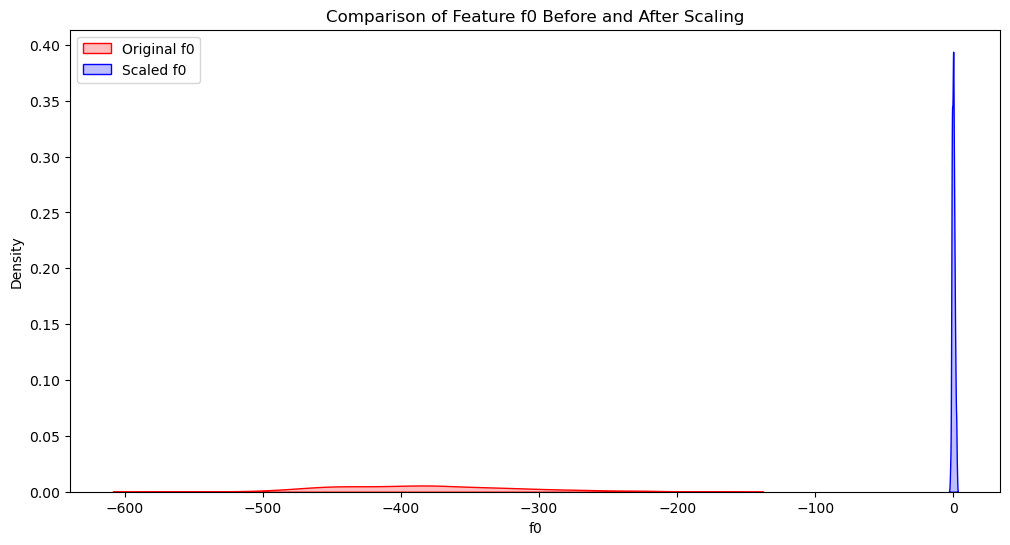

In [7]:
df_scaled = pd.DataFrame(X_scaled[:, :5], columns=[f"f{i}" for i in range(5)])

plt.figure(figsize=(12,6))
sns.kdeplot(df["f0"], label="Original f0", fill=True, color="red")
sns.kdeplot(df_scaled["f0"], label="Scaled f0", fill=True, color="blue")
plt.title("Comparison of Feature f0 Before and After Scaling")
plt.legend()
plt.show()

# ✅ Conclusion
- Original features had very different ranges and distributions.  
- Applied **StandardScaler** to bring features to mean = 0 and std = 1.  
- Demonstrated **MinMaxScaler** as an alternative (values between 0–1).  
- Scaling ensures all features contribute equally during training.